In [1]:
#Load packages
import laspy
import os
from shapely.geometry import Polygon
from scipy.integrate import trapz
import pandas as pd
from scipy.spatial import Delaunay
#import pyfor
from matplotlib.animation import FuncAnimation
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker
from sklearn.cluster import DBSCAN

In [2]:
# Get directory
directory = os.getcwd()
directory
#!pip list

'c:\\Users\\tttajude\\MScResearch\\MainFiles'

In [3]:
# Load the Lidar point cloud data
infile = os.path.join(directory, "Knee1ab.las")
in_file = laspy.read(infile)
#inFile = laspy.read("C:\\Users\\tttajude\\Research\\Knee1ab.las")
#in_file = laspy.read("C:\\Users\\tttajude\\Research\\imagecontest1.las")

points = np.vstack((in_file.x, in_file.y, in_file.z)).transpose()
print(f"Number of points: {points.shape[0]}")

Number of points: 29324


In [4]:
#print(lidar_data.columns)
dimension = list(in_file.point_format.dimension_names)
print(dimension)

['X', 'Y', 'Z', 'intensity', 'return_number', 'number_of_returns', 'synthetic', 'key_point', 'withheld', 'overlap', 'scanner_channel', 'scan_direction_flag', 'edge_of_flight_line', 'classification', 'user_data', 'scan_angle', 'point_source_id', 'gps_time', 'red', 'green', 'blue', 'Coord.__Z', 'Coord.__Y', 'Coord.__X']


In [5]:
import pyproj
crs = pyproj.CRS.from_epsg(32617) #6543
in_file.header.srs = pyproj.CRS.from_epsg(32617).to_wkt()

In [6]:
# Read the LiDAR point cloud data from LAS file
x = in_file.x
y = in_file.y
z = in_file.z

In [7]:
ri = in_file.red
gi = in_file.green
bi = in_file.blue

r = np.array(ri) / 65280.0
g = np.array(gi) / 65280.0
b = np.array(bi) / 65280.0

In [8]:
# Define the gradient colors for the colormap
colors = [(0.0, 'blue'), (0.3111, 'green'), (0.645555, 'yellow'), (1.0, 'red')]

# Create the custom colormap
cmap = LinearSegmentedColormap.from_list('gradient', colors)

In [9]:
min_x, min_y, min_z = np.min(points, axis=0)
max_x, max_y, max_z = np.max(points, axis=0)
x_range = np.arange(min_x, max_x, 0.1)
y_range = np.arange(min_y, max_y, 0.1)
xx, yy = np.meshgrid(x_range, y_range)

In [10]:
x_points = in_file.x
y_points = in_file.y
z_points = in_file.z

r_values = in_file.red
g_values = in_file.green
b_values = in_file.blue

# Print the summary of x, y, and z values
print("Summary of X values:")
print(f"  Minimum: {np.min(b_values)}")
print(f"  Maximum: {np.max(b_values)}")
print("")

print("Summary of Y values:")
print(f"  Minimum: {np.min(y_points)}")
print(f"  Maximum: {np.max(y_points)}")
#print(f"  Mean: {np.mean(y_points)}")
#print(f"  Median: {np.median(y_points)}")
#print(f"  Standard Deviation: {np.std(y_points)}")
print("")

print("Summary of Z values:")
print(f"  Minimum: {np.min(z_points)}")
print(f"  Maximum: {np.max(z_points)}")
print("")

Summary of X values:
  Minimum: 0
  Maximum: 65280

Summary of Y values:
  Minimum: 3966855.858032
  Maximum: 3966856.679565

Summary of Z values:
  Minimum: 0.56858
  Maximum: 1.299158



In [11]:
xmin, ymin, zmin = np.min(points, axis=0)
xmax, ymax, zmax = np.max(points, axis=0)

In [12]:
# Filter the points within the defined boundaries
x_points_filtered = []
y_points_filtered = []
z_points_filtered = []
for i in range(len(x_points)):
    if (xmin <= x_points[i] <= xmax) and (ymin <= y_points[i] <= ymax) and (zmin <= z_points[i] <= zmax):
        x_points_filtered.append(x_points[i])
        y_points_filtered.append(y_points[i])
        z_points_filtered.append(z_points[i])

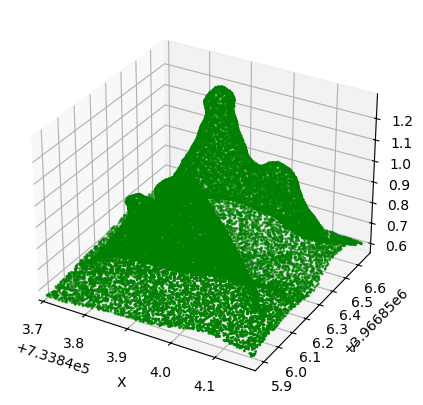

In [13]:
# Create a 3D scatter plot of the filtered points
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_points_filtered, y_points_filtered, z_points_filtered, s=1, c='g')
#ax.scatter(x_points_filtered, y_points_filtered, z_points_filtered, s=1, c=np.vstack((r_values, g_values, b_values)).T / 255)

# Set the limits of the plot to the defined boundaries
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
ax.set_zlim([zmin, zmax])

# Set the labels of the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()

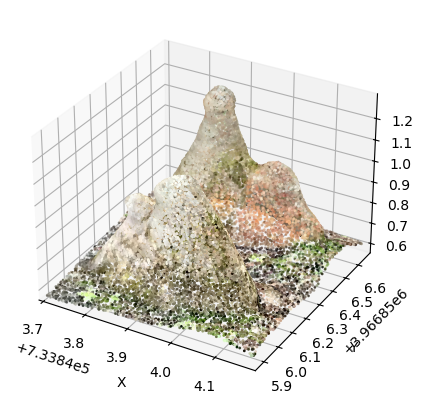

In [14]:
# Normalize RGB values
r_normalized = np.array(r_values) / 65280.0
g_normalized = np.array(g_values) / 65280.0
b_normalized = np.array(b_values) / 65280.0

# Create a 3D scatter plot of the filtered points
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_points_filtered, y_points_filtered, z_points_filtered, s=1, c=np.vstack((r_normalized, g_normalized, b_normalized)).T)

# Set the limits of the plot to the defined boundaries
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
ax.set_zlim([zmin, zmax])

# Set the labels of the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()

C:\Users\tttajude\AppData\Local\Temp\ipykernel_58708\444086643.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('seismic')  # choose a color map, e.g. 'cool', "copper"


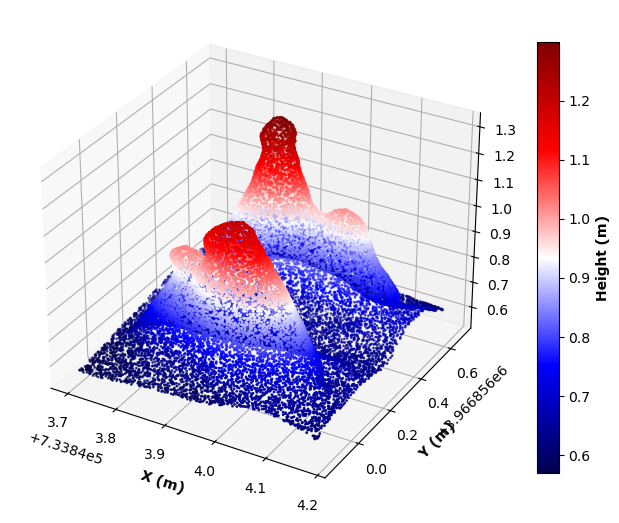

In [15]:
# Define the color map
cmap = plt.cm.get_cmap('seismic')  # choose a color map, e.g. 'cool', "copper"
#Link to diffrent colour map code: https://i.stack.imgur.com/cmk1J.png

# Set the default graphic style of plots in the notebook to 'ggplot'
plt.style.use('default')

# Create a 3D scatter plot of the points, with color based on z-value
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x_points, y_points, z_points, s=1, c=z_points, cmap=cmap)

# Set the axis labels and colorbar
ax.set_xlabel('X (m)', fontsize=10, fontdict={'family': 'Verdana', 'weight': 'bold'})
ax.set_ylabel('Y (m)', fontsize=10, fontdict={'family': 'Verdana', 'weight': 'bold'})

#Adjust the length of the colorbar
cbar = plt.colorbar(sc, shrink=0.7)  # You can adjust the shrink value to reduce the length
cbar.set_label('Height (m)', fontsize=10, fontdict={'family': 'Verdana', 'weight': 'bold'})

# Ensure the plot is updated
ax.autoscale(enable=True, axis='both')
ax.set_box_aspect([1, 1, 0.8])  # Adjust the aspect ratio of the plot
plt.savefig('lidar_plot1.png', dpi=150)

# Show the plot
plt.show()


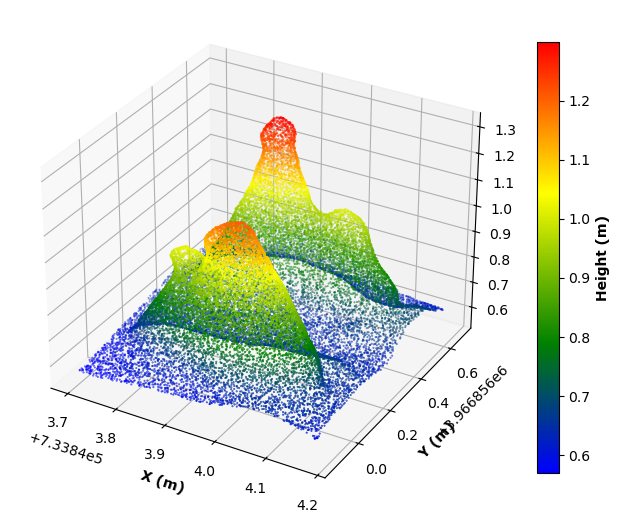

In [16]:
# Define the gradient colors for the colormap
colors = [(0.0, 'blue'), (0.3, 'green'), (0.65, 'yellow'), (1.0, 'red')]

# Create the custom colormap
cmap = LinearSegmentedColormap.from_list('gradient', colors)

# Set the default graphic style of plots in the notebook to 'ggplot'
plt.style.use('default')

# Create a 3D scatter plot of the points, with color based on z-value
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x_points, y_points, z_points, s=0.2, c=z_points, cmap=cmap)

# Set the axis labels and colorbar
ax.set_xlabel('X (m)', fontsize=10, fontdict={'family': 'Verdana', 'weight': 'bold'})
ax.set_ylabel('Y (m)', fontsize=10, fontdict={'family': 'Verdana', 'weight': 'bold'})

cbar = plt.colorbar(sc, shrink=0.7)
cbar.set_label('Height (m)', fontsize=10, fontdict={'family': 'Verdana', 'weight': 'bold'})

# Ensure the plot is updated
ax.autoscale(enable=True, axis='both')
ax.set_box_aspect([1, 1, 0.8])  # Adjust the aspect ratio of the plot
plt.savefig('lidar_plot1.png', dpi=150)

# Show the plot
plt.show()

In [17]:
classification = in_file['classification']

C:\Users\tttajude\AppData\Local\Temp\ipykernel_58708\4152596400.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm', len(set(classification)))  # choose a color map based on the number of unique classes


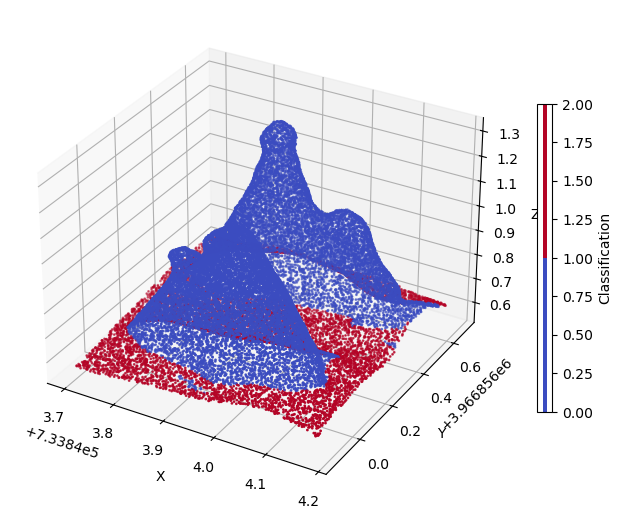

In [21]:
# Define the color map
cmap = plt.cm.get_cmap('coolwarm', len(set(classification)))  # choose a color map based on the number of unique classes

# Set the default graphic style of plots in the notebook to 'ggplot'
plt.style.use('default')

# Create a 3D scatter plot of the points, with color based on classification value
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x_points, y_points, z_points, s=1, c=classification, cmap=cmap)

# Set the axis labels and colorbar
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
cbar = plt.colorbar(sc, shrink = 0.5)
cbar.set_label('Classification')

# Adjust the length of the color bar
cbar.ax.set_aspect(40)
#top_nationalities_plot.get_figure().savefig('test_hr.png', dpi=300)

# Show the plot
plt.show()

### Create plot for paper

In [23]:
# Load the point cloud in LAS format
las_file = laspy.read(os.path.join(directory, "OriginalData", "visualisationb.las"))

# Extract the point coordinates and classification labels
x = las_file.x
y = las_file.y
z = las_file.z

# = inFile.x
# = inFile.y
# = inFile.z
labels = las_file.classification

In [24]:
# Create a colormap dictionary for each label
label_color_map = {0: 'olive', # unclassified points will be white
                   #1: 'white', # red for class 1
                   2: '#302b54', # green for class 2
                   #3: 'blue', # blue for class 3
                   #4: 'yellow'# yellow for class 4
                  } 

# Assign colors to each point based on its classification label
point_colors = [label_color_map[label] for label in labels]

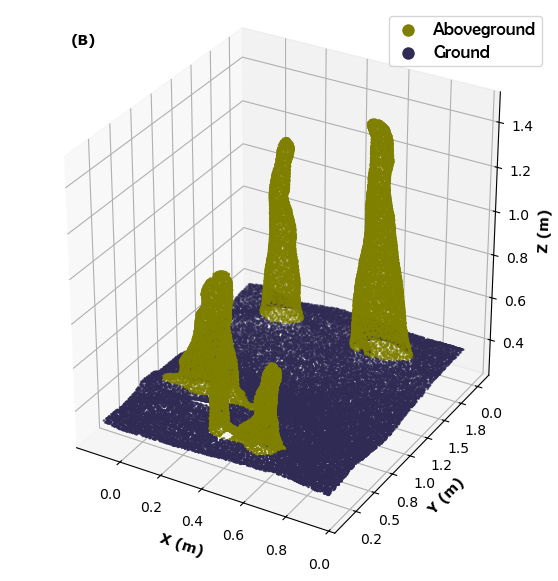

In [25]:
# Plot the colored point cloud in 3D
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=0.7, c=point_colors)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.1f}'.format(x % 1)))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:.1f}'.format(y % 2)))

# Add a legend to the plot
#legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Class {}'.format(label), markerfacecolor=color, markersize=10) for label, color in label_color_map.items()]
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='{}'.format('Aboveground' if label == 0 else 'Ground'), markerfacecolor=color, markersize=10) for label, color in label_color_map.items()]
# Create the legend elements
ax.legend(handles=legend_elements)

# Set the axis labels and colorbar
ax.set_xlabel('X (m)', fontsize=10, fontdict={'family': 'Verdana', 'weight': 'bold'})
ax.set_ylabel('Y (m)', fontsize=10, fontdict={'family': 'Verdana', 'weight': 'bold'})
ax.set_zlabel('Z (m)', fontsize=10, fontdict={'family': 'Verdana', 'weight': 'bold'})
ax.set_title('(B)', fontsize=10, fontdict={'family': 'Verdana', 'weight': 'bold'},  x=0.137, y=1)

# Ensure the plot is updated
ax.autoscale(enable=True, axis='both')
ax.set_box_aspect([0.9, 1, 1])  # Adjust the aspect ratio of the plot

# Get the current legend and modify the handle size and font properties
leg = ax.get_legend()
for text in leg.get_texts():
    text.set_fontfamily('Berlin Sans FB')
    text.set_fontsize(13)

plt.savefig('lidar_plot2b.png', dpi=300)
plt.show()

In [26]:
# Load the point cloud in LAS format
las_file1 = laspy.read(os.path.join(directory, "OriginalData", "visualisationb1.las"))

# Extract the point coordinates and classification labels
x1 = las_file1.x
y1 = las_file1.y
z1 = las_file1.z

labels = las_file1.classification

# Create a colormap dictionary for each label
label1_color_map = {0: 'green', # unclassified points will be white
                   #1: 'white', # red for class 1
                   2: 'brown', # green for class 2
                   #3: 'blue', # blue for class 3
                   #4: 'yellow'# yellow for class 4
                  } 

# Assign colors to each point based on its classification label
point_colors1 = [label1_color_map[label] for label in labels]

In [27]:
# Create a colormap dictionary for each label
label_color_map = {0: 'green', # unclassified points will be white
                   #1: 'white', # red for class 1
                   2: 'brown', # green for class 2
                   #3: 'blue', # blue for class 3
                   #4: 'yellow'# yellow for class 4
                  } 

# Assign colors to each point based on its classification label
point_colors = [label_color_map[label] for label in labels]

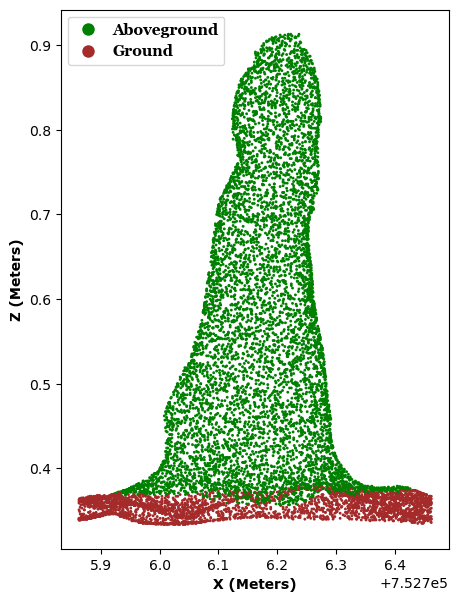

In [28]:
# Create the 2D plot and add the colored points
fig, ax = plt.subplots(figsize=(5, 7))
ax.scatter(x1, z1, s=1.1, c=point_colors)
#ax.scatter(x, z, s=1.1)

# Add a legend to the plot
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='{}'.format('Aboveground' if label == 0 else 'Ground'), markerfacecolor=color, markersize=10) for label, color in label_color_map.items() if label in [0, 2]]
ax.legend(handles=legend_elements)

# Add labels to the plot
ax.set_xlabel('X (Meters)', fontsize=10, fontdict={'family': 'Verdana', 'weight': 'bold'})
ax.set_ylabel('Z (Meters)', fontsize=10, fontdict={'family': 'Verdana', 'weight': 'bold'})

# Format the legend font size and font family
leg = ax.get_legend()
for text in leg.get_texts():
    text.set_fontsize(11)
    text.set_fontfamily('Georgia')
    text.set_fontweight('bold')


plt.savefig('lidar_plot3.png', dpi=150)
# Show the plot
plt.show()

#plt.savefig('lidar_plot.png', dpi=200)

### Generate Cone Geometry and superimpose on point cloud for shape comparison

In [29]:
#las_fil = laspy.read(os.path.join(directory, "Knee1ac2a.las"))
las_fil = laspy.read(os.path.join(directory, "OriginalData", "visualisationb2.las"))

las_file2 = las_fil.points[las_fil.classification == 0]

# get the x, y, and z coordinates of the points
x1 = las_file2.x
y1 = las_file2.y
z1 = las_file2.z

# Find the maximum z-coordinate point in the point cloud
tip_point = np.max(z1)

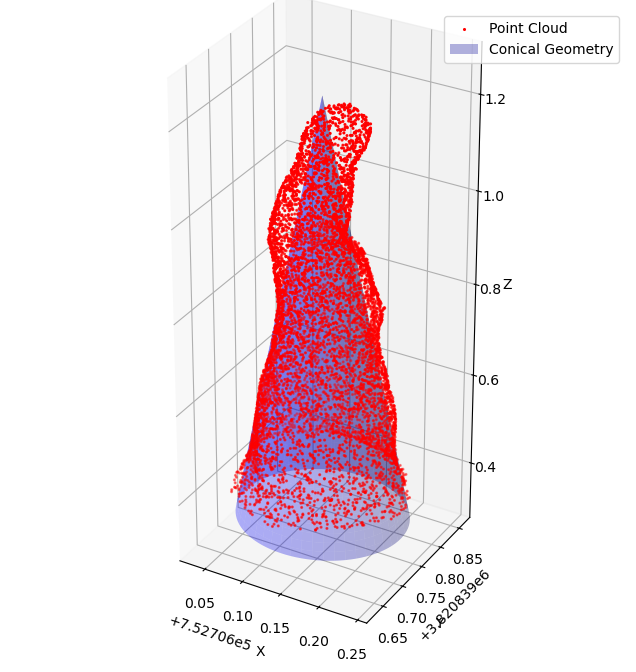

In [30]:
# Parameters for the conical geometry
radius = 0.1024
height = 0.902

# Calculate centroid of the point cloud
centroid = np.mean(np.vstack((x1, y1, z1)), axis=1)

# Calculate the maximum z-coordinate of the point cloud
max_z_cloud = np.max(z1)

# Calculate the z-coordinate of the cone's tip
z_tip_cone = max_z_cloud - height

# Create meshgrid for the conical surface
theta_mesh = np.linspace(0, 2*np.pi, 100)
z_mesh = np.linspace(0, height, 100)
theta_mesh, z_mesh = np.meshgrid(theta_mesh, z_mesh)

# Compute coordinates of the conical surface centered at the centroid
x_cone = centroid[0] + radius * (1 - z_mesh/height) * np.cos(theta_mesh)
y_cone = centroid[1] + radius * (1 - z_mesh/height) * np.sin(theta_mesh)
z_cone = z_tip_cone + z_mesh  # Align the tip of the cone with the maximum z-coordinate of the point cloud

# Plot the point cloud and the conical geometry
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the point cloud
ax.scatter(x1, y1, z1, c='r', s=1.5, marker='o', label='Point Cloud')

# Plot the conical geometry
ax.plot_surface(x_cone, y_cone, z_cone, color='b', alpha=0.3, label='Conical Geometry')

# Set labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

ax.autoscale(enable=True, axis='both')
ax.set_box_aspect([1, 1, 2.5])  # Adjust the aspect ratio of the plot

plt.show()


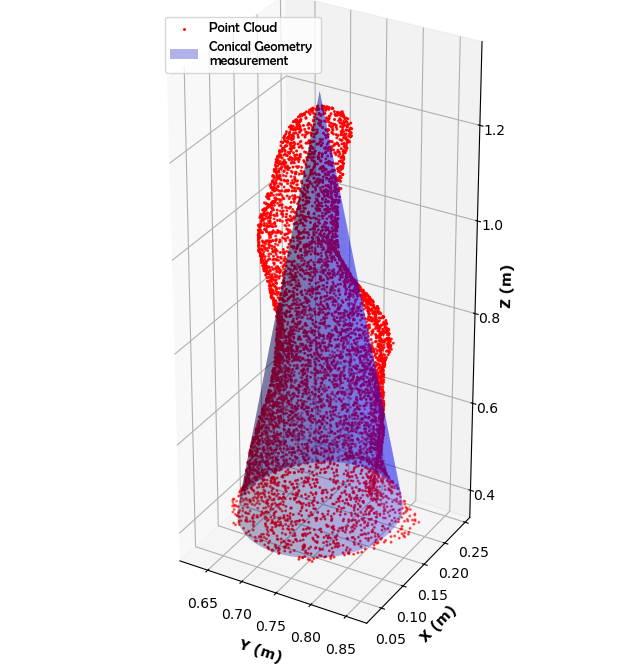

In [31]:
# Parameters for the conical geometry
radius = 0.1024
height = 0.902

# Calculate centroid of the point cloud
centroid = np.mean(np.vstack((x1, y1, z1)), axis=1)

# Calculate the minimum z-coordinate of the point cloud
min_z_cloud = np.min(z1)

# Calculate the z-coordinate of the cone's base
z_base_cone = min_z_cloud

# Create meshgrid for the conical surface
theta_mesh = np.linspace(0, 2*np.pi, 100)
z_mesh = np.linspace(0, height, 100)
theta_mesh, z_mesh = np.meshgrid(theta_mesh, z_mesh)

# Compute coordinates of the conical surface centered at the centroid
x_cone = centroid[0] + radius * (1 - z_mesh/height) * np.cos(theta_mesh)
y_cone = centroid[1] + radius * (1 - z_mesh/height) * np.sin(theta_mesh)
z_cone = z_base_cone + z_mesh  # Align the base of the cone with the minimum z-coordinate of the point cloud

# Plot the point cloud and the conical geometry
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the point cloud
ax.scatter(y1, x1, z1, c='r', s=1.2, marker='o', label='Point Cloud')

# Plot the conical geometry
ax.plot_surface(y_cone, x_cone, z_cone, color='b', alpha=0.3, label='Conical Geometry \nmeasurement')

# Set labels and legend
ax.set_xlabel('Y (m)', fontsize=10, fontdict={'family': 'Verdana', 'weight': 'bold'})
ax.set_ylabel('X (m)', fontsize=10, fontdict={'family': 'Verdana', 'weight': 'bold'})
ax.set_zlabel('Z (m)', fontsize=10, fontdict={'family': 'Verdana', 'weight': 'bold'})
ax.legend()

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.2f}'.format(x % 1)))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:.2f}'.format(y % 1)))

ax.legend(loc='upper left', bbox_to_anchor=(0.24, 1))
ax.tick_params(axis='x', which='major', pad=3)
ax.tick_params(axis='y', which='major', pad=3)

ax.autoscale(enable=True, axis='both')
ax.set_box_aspect([1, 1, 2.5])  # Adjust the aspect ratio of the plot

leg = ax.get_legend()
    
for text in leg.get_texts():
    text.set_fontfamily('Berlin Sans FB')
    text.set_fontsize(10)


plt.savefig('lidar_geometrya.png', dpi=300)
plt.show()


In [32]:
infile = os.path.join(directory, "OriginalData", "Knee1a2a.las")
las_file = laspy.read(infile)

import pyproj
crs = pyproj.CRS.from_epsg(32617) #6543, 4326
las_file.header.srs = pyproj.CRS.from_epsg(32617).to_wkt()

In [33]:
# Select only points classified as non-ground points (class code 0)
las_file = las_file.points[las_file.classification == 0]

# get the x, y, and z coordinates of the points
x = las_file.x
y = las_file.y
z = las_file.z

#convert las lidar points to numpy array
points = np.vstack((las_file.x, las_file.y, las_file.z)).transpose() 
point_cloud = np.vstack((las_file.x, las_file.y, las_file.z)).transpose()
print(f"Number of points: {points.shape[0]}")

Number of points: 43368


In [34]:
# Perform clustering on the non-ground points
dbscan = DBSCAN(eps=0.015, min_samples=10)
#labels = dbscan.fit_predict(points)
labels = dbscan.fit_predict(np.column_stack((x, y, z)))

# get the number of clusters
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)      
print("Number of knees identified:", num_clusters)

Number of knees identified: 6


In [35]:
def return_first(num_clusters):
    for i in range(num_clusters):
        if np.any(labels == i):
            cluster_points = np.where(labels == i)[0][0]
            cluster_x = x[cluster_points]
            cluster_y = y[cluster_points]
            cluster_z = z[cluster_points]
            return cluster_x, cluster_y, cluster_z

In [36]:
# Get the indices of points belonging to the first cluster
first_cluster_indices = np.where(labels == 0)[0]

# Extract points of the first cluster
x1 = x[first_cluster_indices]
y1 = y[first_cluster_indices]
z1 = z[first_cluster_indices]

In [37]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as ticker

# Define the gradient colors for the colormap
#colors = [(0.0, 'blue'), (0.2111, 'green'), (0.3111, 'yellow'), (0.4111, 'red'), (1.0, 'brown')]
colors = [(0.0, 'brown'), (0.2566, 'green'), (0.345555, 'yellow'), (0.6111, 'brown'), (1.0, 'red')]
#colors = [(0.0, 'brown'), (0.3111, 'green'), (0.645555, 'yellow'), (1.0, 'red')]
# Create the custom colormap
cmap = LinearSegmentedColormap.from_list('gradient', colors)

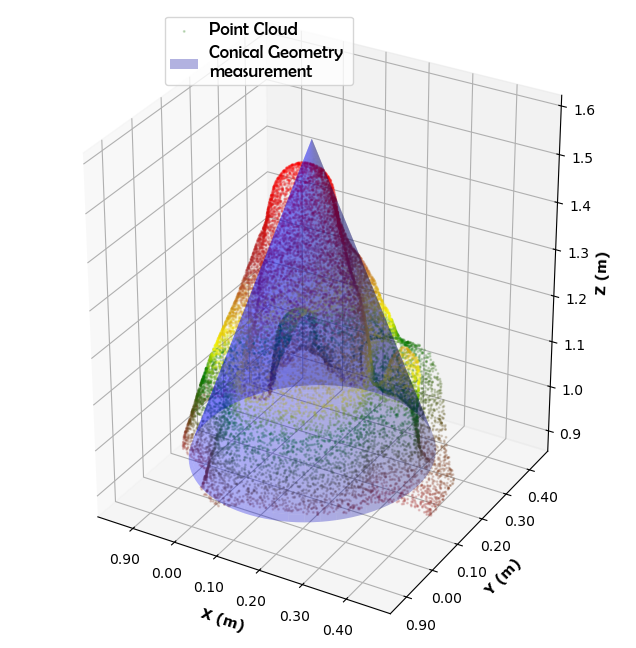

In [38]:
# Parameters for the conical geometry
radius = 0.25273
height = 0.670212

# Calculate centroid of the point cloud
centroid = np.mean(np.vstack((x1, y1, z1)), axis=1)

# Calculate the minimum z-coordinate of the point cloud
min_z_cloud = np.min(z1)

# Calculate the z-coordinate of the cone's base
z_base_cone = min_z_cloud

# Create meshgrid for the conical surface
theta_mesh = np.linspace(0, 2*np.pi, 100)
z_mesh = np.linspace(0, height, 100)
theta_mesh, z_mesh = np.meshgrid(theta_mesh, z_mesh)

# Compute coordinates of the conical surface centered at the centroid
x_cone = centroid[0] + radius * (1 - z_mesh/height) * np.cos(theta_mesh)
y_cone = centroid[1] + radius * (1 - z_mesh/height) * np.sin(theta_mesh)
z_cone = z_base_cone + z_mesh  # Align the base of the cone with the minimum z-coordinate of the point cloud

# Plot the point cloud and the conical geometry
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the point cloud
ax.scatter(x1, y1, z1, c=z1, cmap=cmap, s=1.2, marker='o', alpha=0.2, label='Point Cloud')

# Plot the conical geometry
ax.plot_surface(x_cone, y_cone, z_cone, color='b', alpha=0.3, label='Conical Geometry \nmeasurement')

# Set labels and legend
ax.set_xlabel('X (m)', fontsize=10, fontdict={'family': 'Verdana', 'weight': 'bold'})
ax.set_ylabel('Y (m)', fontsize=10, fontdict={'family': 'Verdana', 'weight': 'bold'})
ax.set_zlabel('Z (m)', fontsize=10, fontdict={'family': 'Verdana', 'weight': 'bold'})
ax.legend()

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.2f}'.format(x % 1)))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:.2f}'.format(y % 1)))

ax.legend(loc='upper left', bbox_to_anchor=(0.24, 1))
ax.tick_params(axis='x', which='major', pad=3)
ax.tick_params(axis='y', which='major', pad=3)

ax.autoscale(enable=True, axis='both')
ax.set_box_aspect([0.9, 0.9, 1.1])  # Adjust the aspect ratio of the plot

leg = ax.get_legend()
    
for text in leg.get_texts():
    text.set_fontfamily('Berlin Sans FB')
    text.set_fontsize(13)

# Save plot
plt.savefig('lidar_geometryb.png', dpi=300)
plt.show()
